# Assignment 2
## Gradient of Gaussian Filtering


#### a) Compute continuous 5 X 5 GoG-filter kernels for convolution in x- and y-direction.

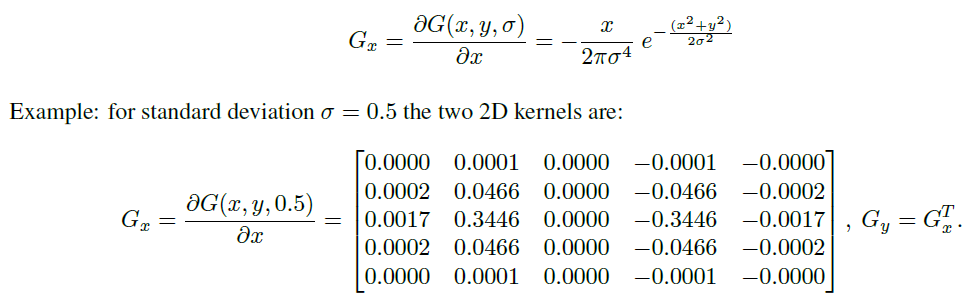

In [81]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

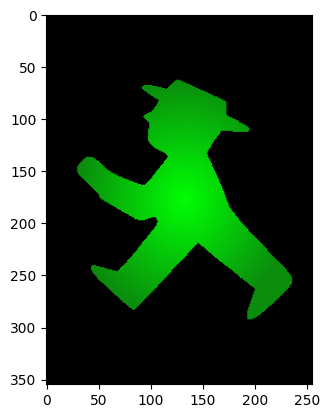

In [82]:
#Read the given image
img=cv2.imread("ampelmaennchen.png")
# Display the image
plt.imshow(img)
plt.show()

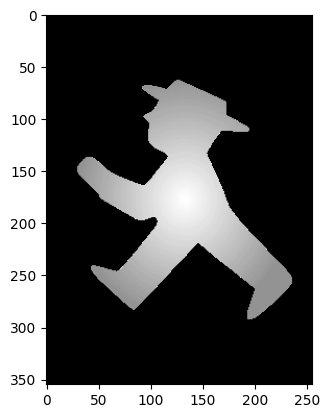

In [83]:
# Load the image in grayscale
image = cv2.imread("ampelmaennchen.png", cv2.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python) given
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
cv2.imwrite('Gray.png',image)
plt.show()

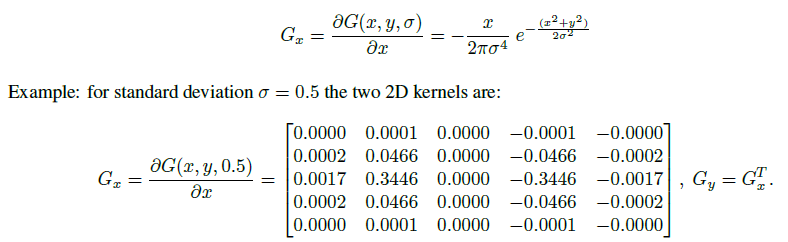

In [84]:
kernelsize = 5 #given kernalsize 5*5
standard_deviation = 0.5 #signma is 0.5 given
limit = int((kernelsize - 1) / 2)
x, y = np.meshgrid(np.arange(-limit, limit + 1), np.arange(-limit, limit + 1))

Here I break down the equation to make it easy in writting (a,b,c)

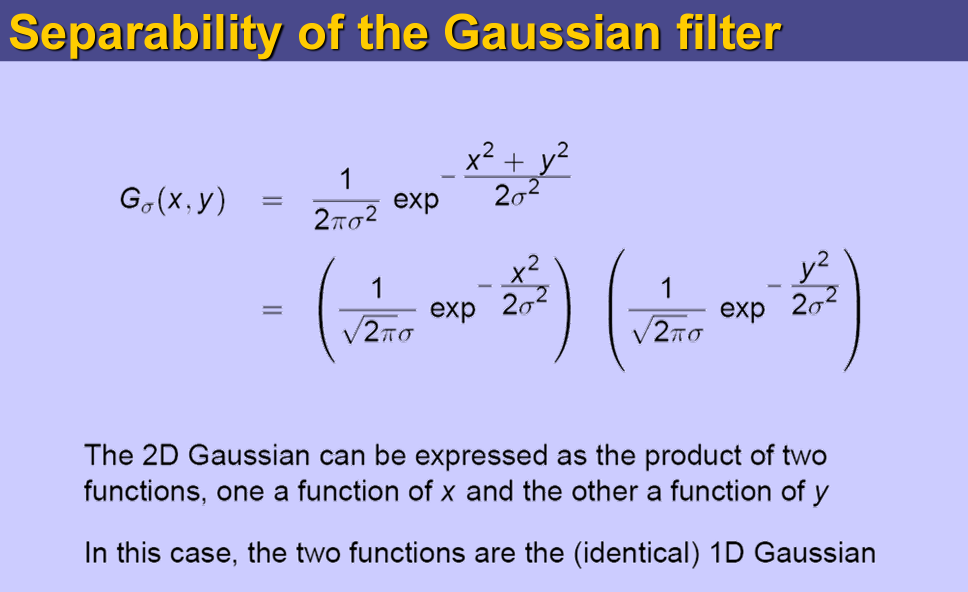

In [85]:
# Compute the Gaussian kernel values
a = -(x / (2 * math.pi * standard_deviation ** 4))
b = -((x ** 2 + y ** 2) / (2 * standard_deviation ** 2))
c = np.exp(b)
Gx = np.round(a * c, 4)
print("Gx = \n", Gx)
np.savetxt("Gx.txt", Gx, fmt="%0.4f", delimiter="\t")

Gx = 
 [[ 0.000e+00  1.000e-04 -0.000e+00 -1.000e-04 -0.000e+00]
 [ 2.000e-04  4.660e-02 -0.000e+00 -4.660e-02 -2.000e-04]
 [ 1.700e-03  3.446e-01 -0.000e+00 -3.446e-01 -1.700e-03]
 [ 2.000e-04  4.660e-02 -0.000e+00 -4.660e-02 -2.000e-04]
 [ 0.000e+00  1.000e-04 -0.000e+00 -1.000e-04 -0.000e+00]]


In [86]:
Gy = Gx.transpose() #Gy is transpose of Gx given
print("Gy = \n", Gy)
np.savetxt("Gy.txt", Gy, fmt="%0.4f", delimiter="\t")

Gy = 
 [[ 0.000e+00  2.000e-04  1.700e-03  2.000e-04  0.000e+00]
 [ 1.000e-04  4.660e-02  3.446e-01  4.660e-02  1.000e-04]
 [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 [-1.000e-04 -4.660e-02 -3.446e-01 -4.660e-02 -1.000e-04]
 [-0.000e+00 -2.000e-04 -1.700e-03 -2.000e-04 -0.000e+00]]


#### b) Apply these filters to your input image I to derive two gradient images: Ix and Iy (one in x- and one in y- direction). Write a function for the convolution of the image with the kernel and ignore the boundaries of the image for simplicity, i.e. no padding needed (you may use built-in convolution function).

Use the grayscale version of the provided image ampelmaennchen.png. For gray conversion use built-in functions such as rgb2gray(img) in Octave or cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python. Normalize the image to range [0:0; 1:0] and make sure to use double-precision floating-point format.

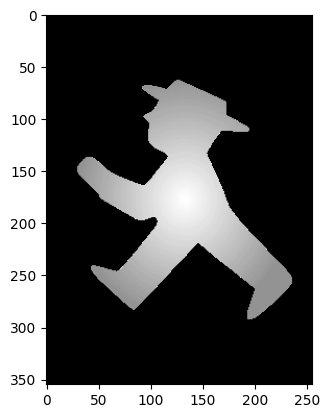

In [87]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
cv2.imwrite('Gray.png',image)
plt.show()

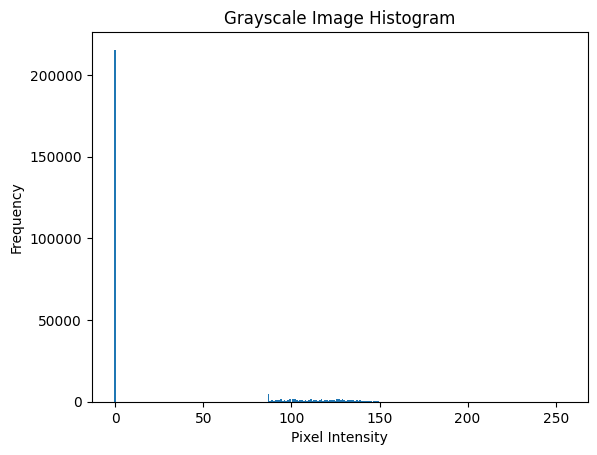

In [88]:
hist, bins = np.histogram(gray_image, bins=256, range=[0, 256])
plt.figure()
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.bar(bins[:-1], hist, width=1)
plt.show()

Normalize
the image to range [0:0; 1:0] and make sure to use double-precision floating-point format.

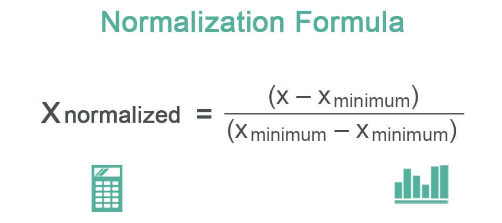

In [89]:
#image to floating-point format
image = image.astype(float)
# Normalize the image to the range [0, 1]
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

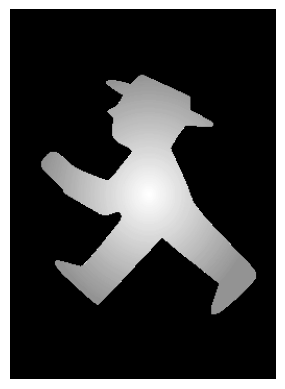

In [90]:
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.show()

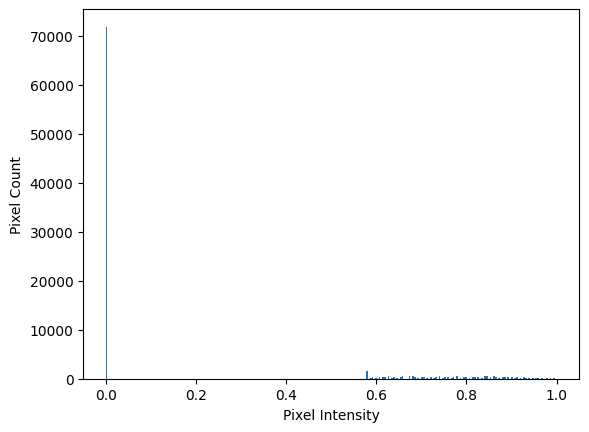

In [91]:
plt.hist(normalized_image.ravel(), bins=256, range=(0.0, 1.0))
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

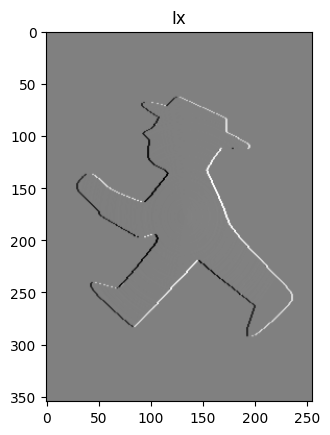

In [92]:
Ix = cv2.filter2D(normalized_image, -1, Gx)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')
plt.axis()
plt.show()

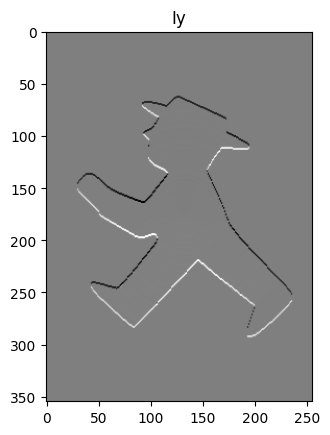

In [93]:
Iy = cv2.filter2D(normalized_image, -1, Gy)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')
plt.axis()
plt.show()

#### c) Compute and visualize the gradient magnitude image G.

In [94]:
gradient_magnitude = np.sqrt((Ix**2 + Iy**2))
print("Gradient Magnitude:")
np.set_printoptions(precision=4)
print(gradient_magnitude)


Gradient Magnitude:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


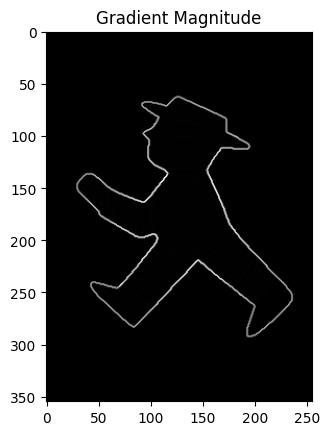

In [95]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis()
plt.title('Gradient Magnitude')
plt.show()

#### d) Show and interpret the results on the provided image and an image of your choice.

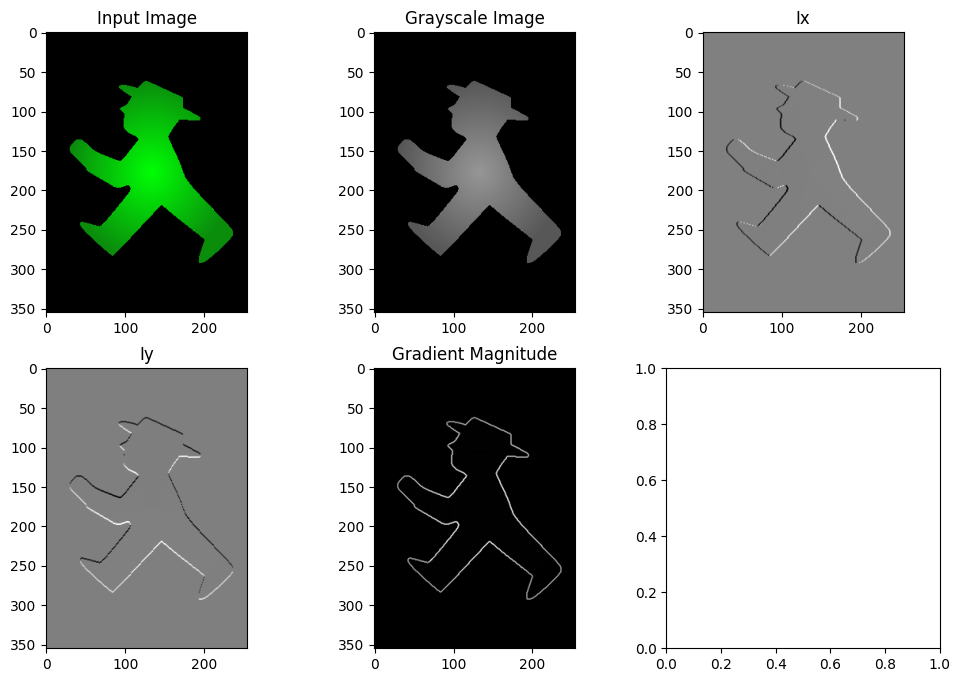

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Input Image')
axes[0, 1].imshow(gray_image, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 2].imshow(Ix, cmap='gray')
axes[0, 2].set_title('Ix')
axes[1, 0].imshow(Iy, cmap='gray')
axes[1, 0].set_title('Iy')
axes[1, 1].imshow(gradient_magnitude, cmap='gray')
axes[1, 1].set_title('Gradient Magnitude')
for ax in axes.flat:
    ax.axis('on')

plt.savefig('Results.png')
plt.show()

1. The input image is a colored image(Green) that is first converted to grayscale. The grayscale image is then filtered using the Gaussian filter to reduce noise and then normalized to have pixel values between 0 and 1. (From Lecture Slides Theory)

2. The normalized image is used to compute the horizontal and vertical gradients.

3. The horizontal gradient image (Ix) shows the intensity gradient of the image in the horizontal direction.

4. Vertical gradient image (Iy) shows the intensity gradient of the image in the vertical direction. 

5. The gradient magnitude image shows the image's overall intensity gradient. The brighter regions in the image represent areas with a higher gradient magnitude, which indicates a significant change in intensity in that region. The darker regions represent areas with lower gradient magnitude, which implies that there is little change in intensity in that region.

6. By analyzing the gradient magnitude image, we can identify the regions in the image where the intensity changes rapidly. (This is mainly used in my Project also where I have to bifercate the image while the intensity is changing rapidly.)